In [1]:
using Distributions
using StatsPlots
using Memoization

default(size=(500, 400))
plot(sin);

In [2]:
@memoize function E_bin(f, n, p)
    bin = Binomial(n, p)
    sum(f(k) * pdf(bin, k) for k in support(bin))
end

@memoize function E_negbin(g, k, p)
    negbin = LocationScale(k, 1, NegativeBinomial(k, p))
    m, s = mean(negbin), std(negbin)
    nmax = round(Int, m + 5s)
    sum(g(n) * pdf(negbin, n) for n in k:nmax)
end

function kl(n, k, p; a = 0.5, b = 0.5)
    p̂ = (k + a)/(n + a + b)
    -(p*log(p̂) + (1 - p)*log(1 - p̂)) - entropy(Bernoulli(p)) 
end

function squared_error(n, k, p; a = 0.5, b = 0.5)
    p̂ = (k + a)/(n + a + b)
    (p̂ - p)^2
end

function abs_error(n, k, p; a = 0.5, b = 0.5)
    p̂ = (k + a)/(n + a + b)
    abs(p̂ - p)
end

abs_error (generic function with 1 method)

  3.539977 seconds (5.40 M allocations: 254.922 MiB, 6.02% gc time, 9.23% compilation time)
(val, idx) = findmin(z) = (0.047898347587918166, CartesianIndex(51, 51))
(a[idx[1]], b[idx[2]]) = (0.51, 0.51)


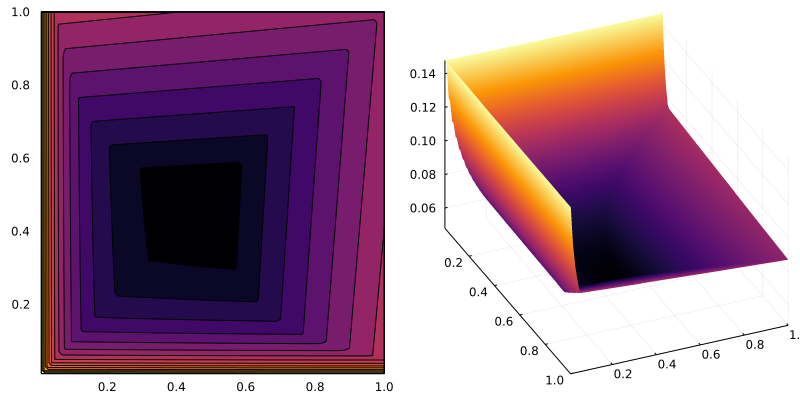

In [3]:
n = 10
@memoize f(n, a, b) =  maximum(p -> E_bin(k -> kl(n, k, p; a, b), n, p), 0.0:0.01:1)
a = b = 0.01:0.01:1
@time z = f.(n, a, b')
@show val, idx = findmin(z)
@show a[idx[1]], b[idx[2]]
P = contourf(a, b, z'; label="")
Q = surface(a, b, z'; label="")
plot(P, Q; size=(800, 400), colorbar=false, camera=(60, 60))

 16.230313 seconds (8.41 M allocations: 393.980 MiB, 2.81% gc time, 1.49% compilation time)
(val, idx) = findmin(z) = (0.09218128401137077, CartesianIndex(69, 66))
(a[idx[1]], b[idx[2]]) = (0.336, 0.43)


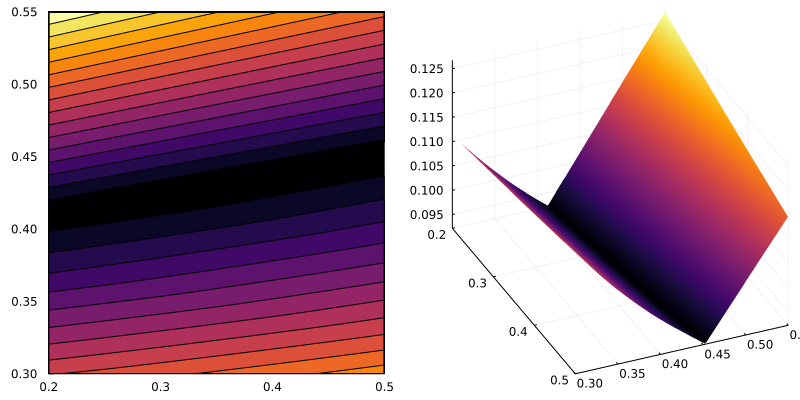

In [4]:
k = 3
@memoize g(k, a, b) =  maximum(p -> E_negbin(n -> kl(n, k, p; a, b), k, p), 0.01:0.01:0.99)
a = 0.2:0.002:0.5
b = 0.3:0.002:0.55
@time z = g.(k, a, b')
@show val, idx = findmin(z)
@show a[idx[1]], b[idx[2]]
P = contourf(a, b, z'; label="")
Q = surface(a, b, z'; label="")
plot(P, Q; size=(800, 400), colorbar=false, camera=(60, 60))

  9.104402 seconds (10.01 M allocations: 488.196 MiB, 8.56% gc time, 2.48% compilation time)
(val, idx) = findmin(z) = (0.014435380308755486, CartesianIndex(109, 109))
(a[idx[1]], b[idx[2]]) = (1.58, 1.58)


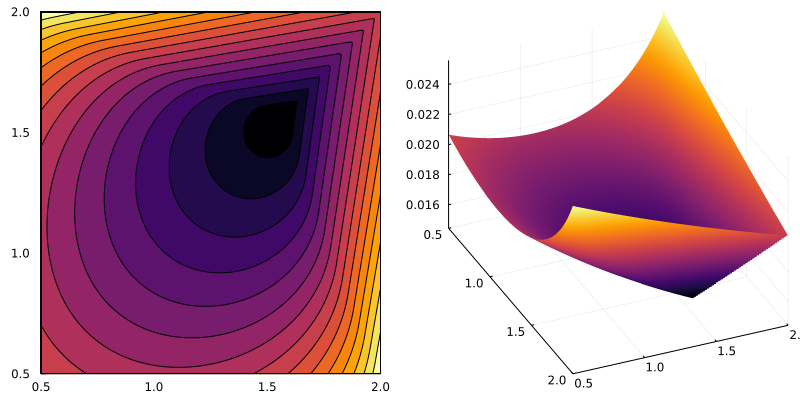

In [5]:
n = 10
@memoize F(n, a, b) =  maximum(p -> E_bin(k -> squared_error(n, k, p; a, b), n, p), 0:0.01:1)
a = b = 0.5:0.01:2
@time z = F.(n, a, b')
@show val, idx = findmin(z)
@show a[idx[1]], b[idx[2]]
P = contourf(a, b, z'; label="")
Q = surface(a, b, z'; label="")
plot(P, Q; size=(800, 400), colorbar=false, camera=(60, 60))

 12.786361 seconds (8.01 M allocations: 380.006 MiB, 1.69% compilation time)
(val, idx) = findmin(z) = (0.029013989479268445, CartesianIndex(61, 78))
(a[idx[1]], b[idx[2]]) = (0.13, 0.654)


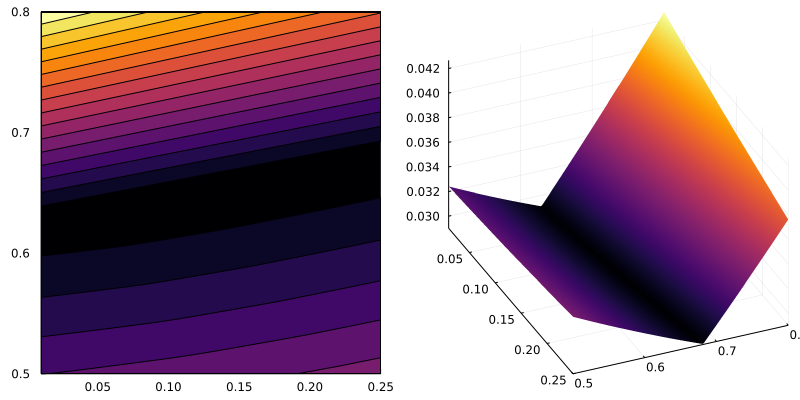

In [6]:
k = 3
@memoize G(k, a, b) =  maximum(p -> E_negbin(n -> squared_error(n, k, p; a, b), k, p), 0.01:0.01:0.99)
a = 0.01:0.002:0.25
b = 0.5:0.002:0.8
@time z = G.(k, a, b')
@show val, idx = findmin(z)
@show a[idx[1]], b[idx[2]]
P = contourf(a, b, z'; label="")
Q = surface(a, b, z'; label="")
plot(P, Q; size=(800, 400), colorbar=false, camera=(60, 60))

 11.382526 seconds (10.01 M allocations: 520.117 MiB, 12.49% gc time, 1.92% compilation time)
(val, idx) = findmin(z) = (0.10265274157994743, CartesianIndex(80, 80))
(a[idx[1]], b[idx[2]]) = (1.29, 1.29)


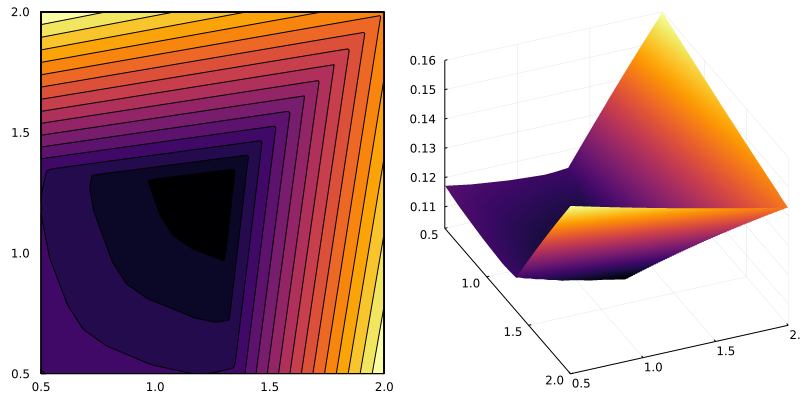

In [7]:
n = 10
@memoize f1(n, a, b) =  maximum(p -> E_bin(k -> abs_error(n, k, p; a, b), n, p), 0:0.01:1)
a = b = 0.5:0.01:2
@time z = f1.(n, a, b')
@show val, idx = findmin(z)
@show a[idx[1]], b[idx[2]]
P = contourf(a, b, z'; label="")
Q = surface(a, b, z'; label="")
plot(P, Q; size=(800, 400), colorbar=false, camera=(60, 60))

 19.878701 seconds (7.22 M allocations: 413.755 MiB, 10.58% gc time, 1.09% compilation time)
(val, idx) = findmin(z) = (0.1411059886538703, CartesianIndex(43, 122))
(a[idx[1]], b[idx[2]]) = (0.62, 0.621)


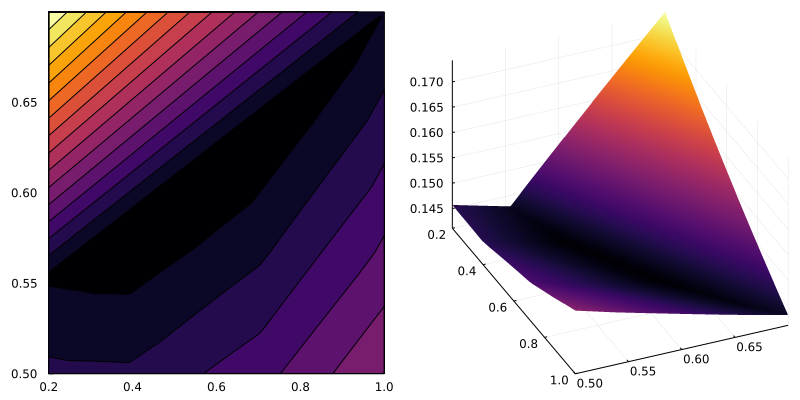

In [8]:
k = 3
@memoize g1(k, a, b) =  maximum(p -> E_negbin(n -> abs_error(n, k, p; a, b), k, p), 0.01:0.01:0.99)
a = 0.2:0.01:1
b = 0.5:0.001:0.7
@time z = g1.(k, a, b')
@show val, idx = findmin(z)
@show a[idx[1]], b[idx[2]]
P = contourf(a, b, z'; label="")
Q = surface(a, b, z'; label="")
plot(P, Q; size=(800, 400), colorbar=false, camera=(60, 60))